In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("/content/Student_performance_data _.csv")

In [4]:
data.shape

(2392, 15)

In [5]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


#Student Information

StudentID: A unique identifier assigned to


Gender: Gender of the students, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other

ParentalEducation:
The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher

Study Habits
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.

Absences: Number of absences during the school year, ranging from 0 to 30.

Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

Parental Involvement
ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High

Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
Academic Performance
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
Target Variable: Grade Class

GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [8]:
data[data.duplicated()].sum()

StudentID            0.0
Age                  0.0
Gender               0.0
Ethnicity            0.0
ParentalEducation    0.0
StudyTimeWeekly      0.0
Absences             0.0
Tutoring             0.0
ParentalSupport      0.0
Extracurricular      0.0
Sports               0.0
Music                0.0
Volunteering         0.0
GPA                  0.0
GradeClass           0.0
dtype: float64

In [9]:
for feature in data.columns:
  print(feature,data[feature].isnull().sum())

StudentID 0
Age 0
Gender 0
Ethnicity 0
ParentalEducation 0
StudyTimeWeekly 0
Absences 0
Tutoring 0
ParentalSupport 0
Extracurricular 0
Sports 0
Music 0
Volunteering 0
GPA 0
GradeClass 0


<Axes: >

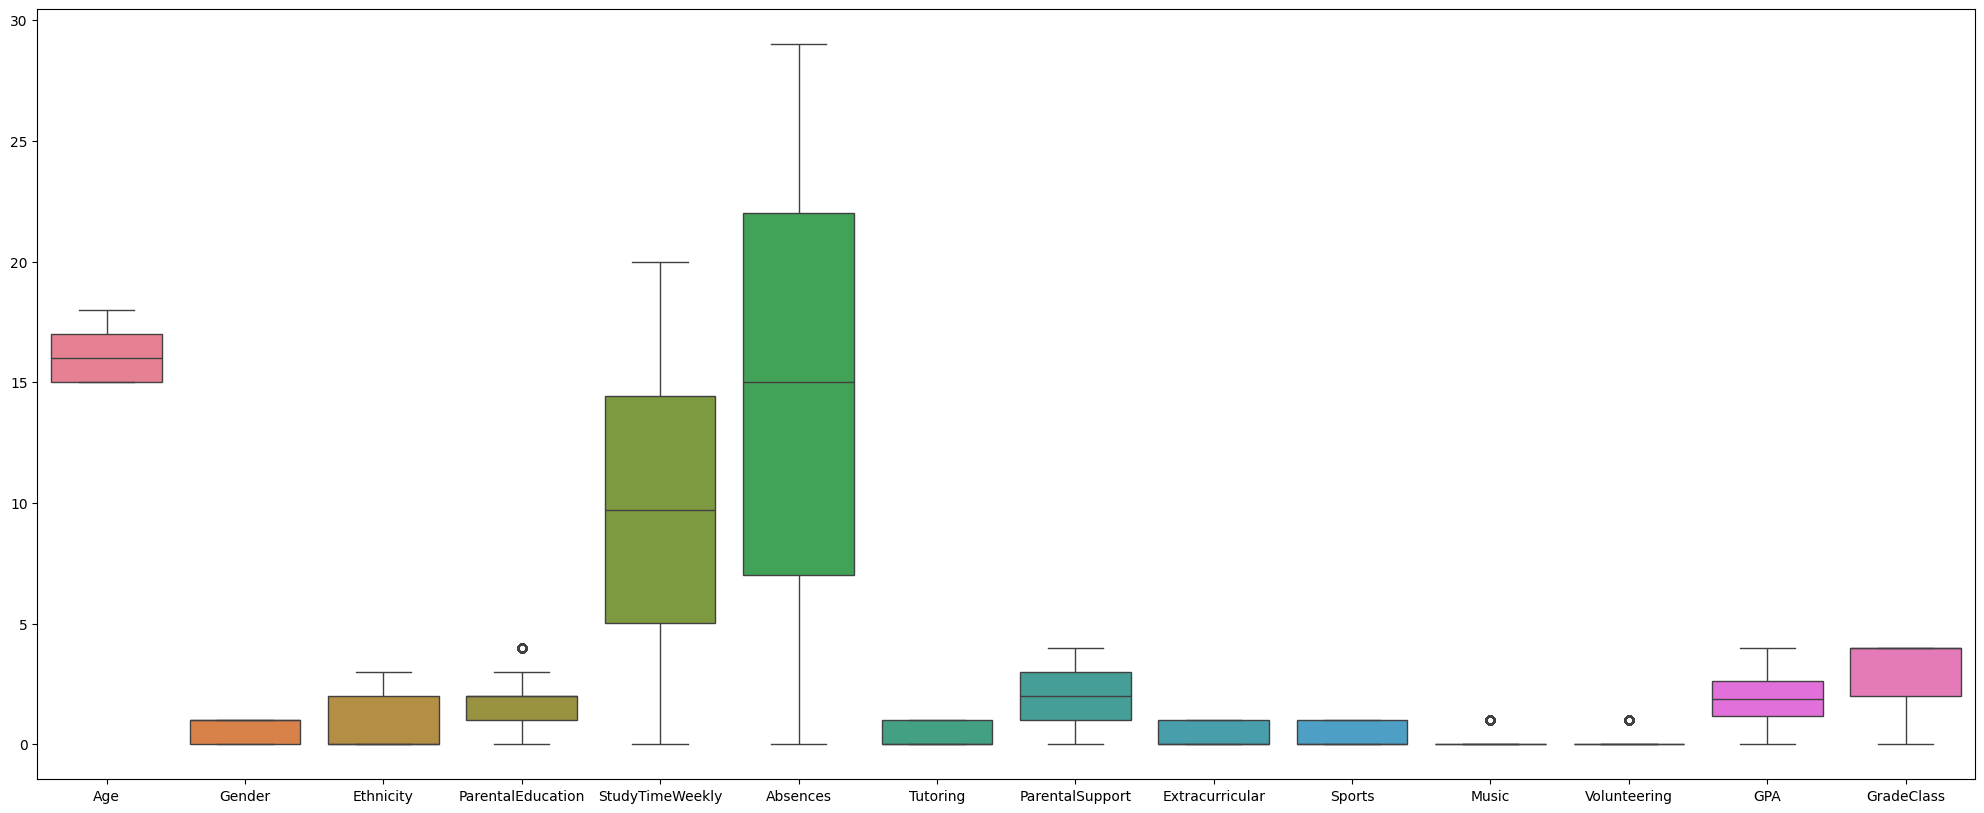

In [37]:
plt.figure(figsize=(25,10))
sns.boxplot(data=data[['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass']])

In [36]:
data["ParentalEducation"].unique()

array([2, 1, 3, 4, 0])

In [39]:
data["Music"].unique()

array([1, 0])

In [40]:
data['Volunteering'].unique()

array([0, 1])

the parental education ,music, voluntering contains outliers, but these outliers are the encoded no. accourding to the categories.

In [44]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [50]:
def count_plot(feature):
  plt.figure(figsize=(20,5))
  sns.countplot(x=feature,data = data,hue = "GradeClass",palette="Blues")
  plt.show()


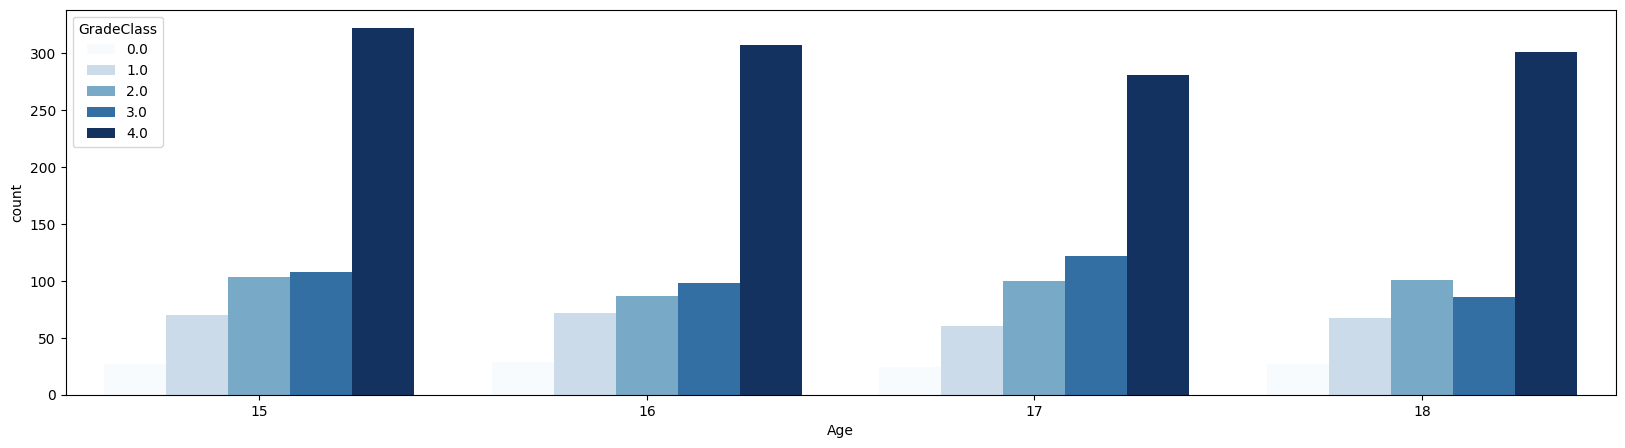

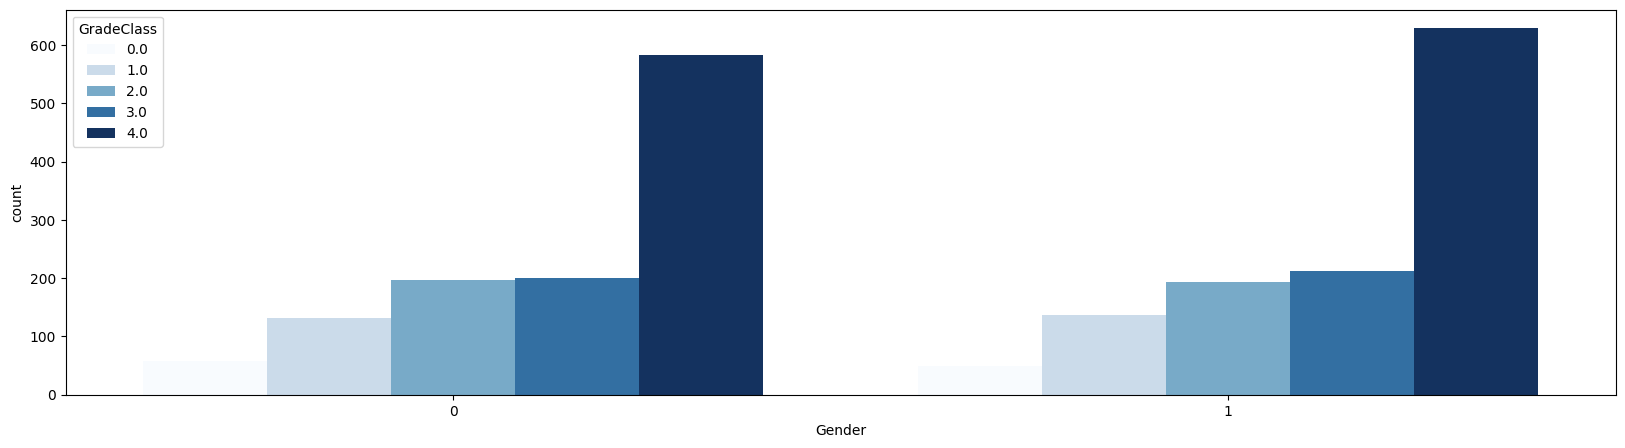

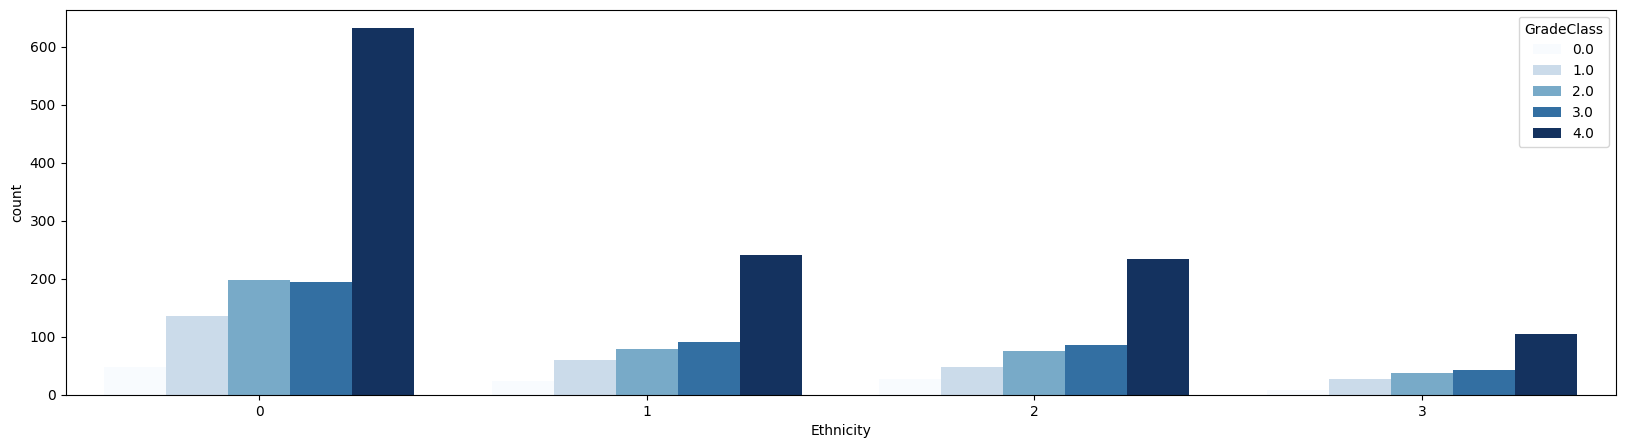

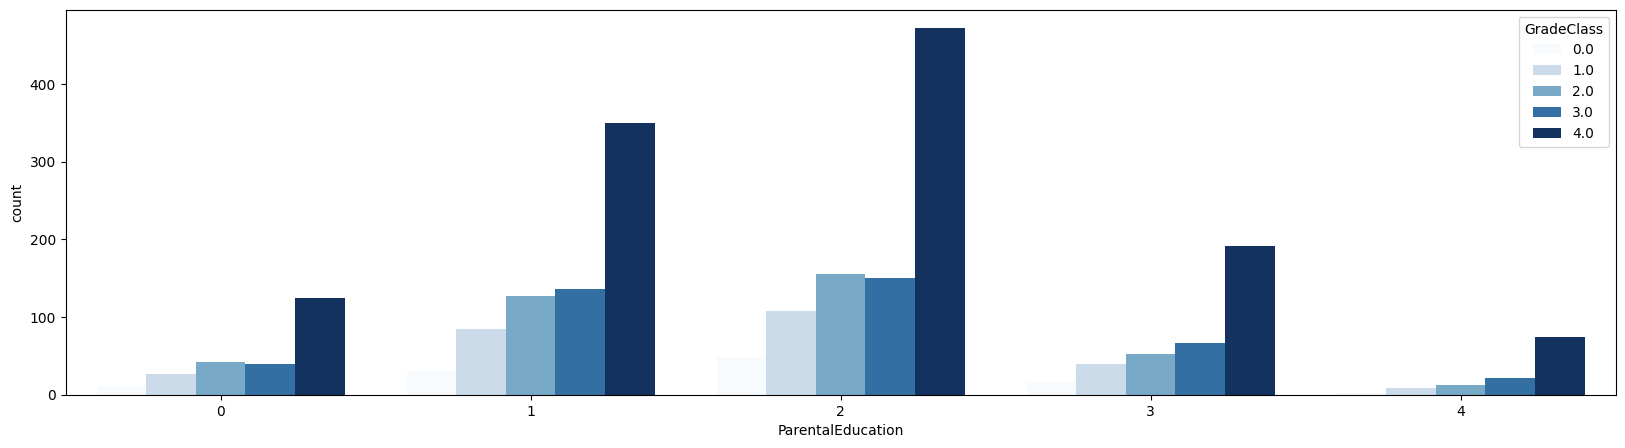

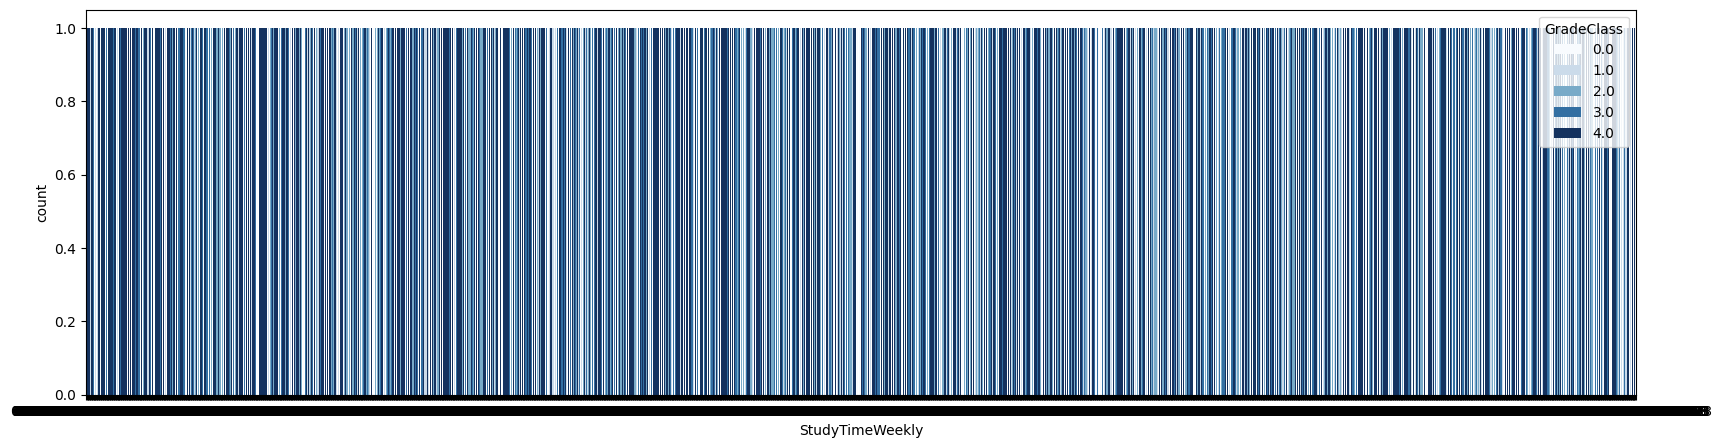

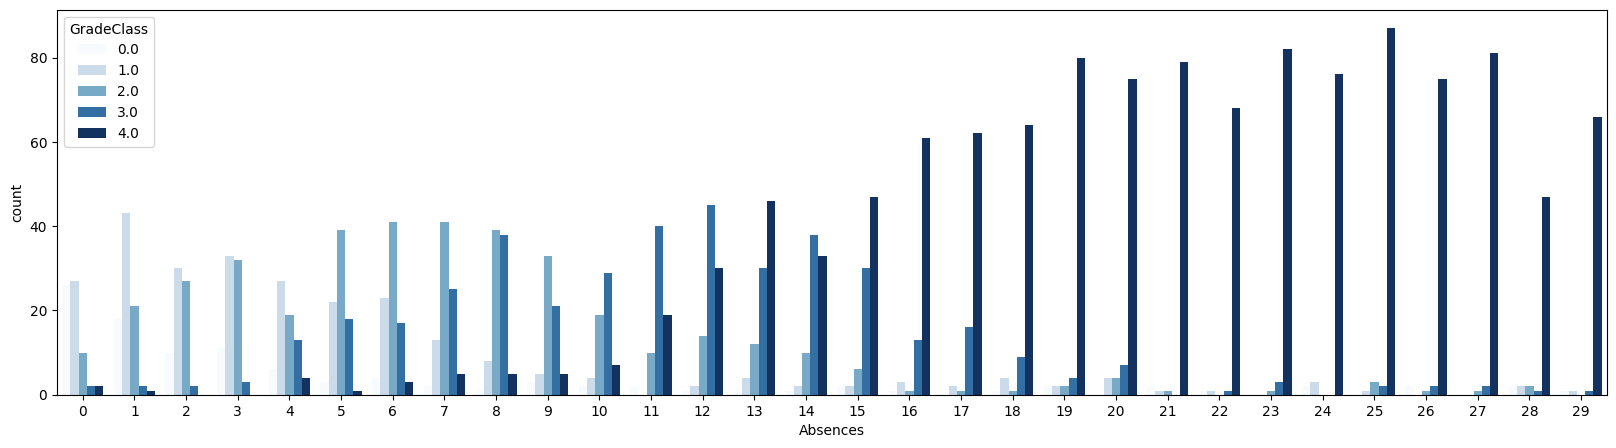

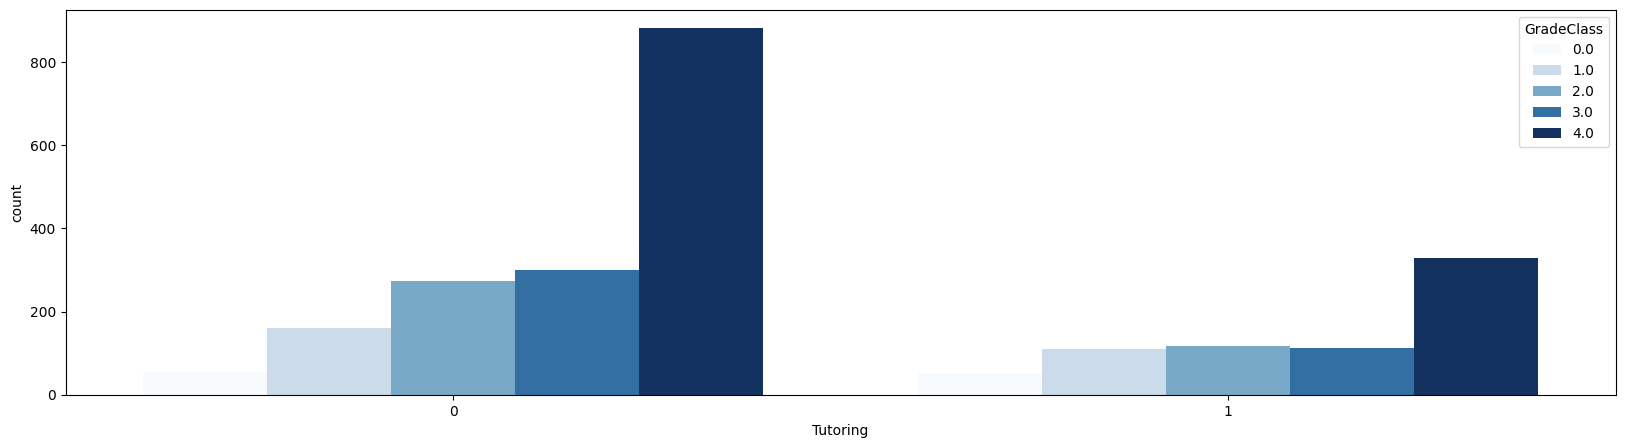

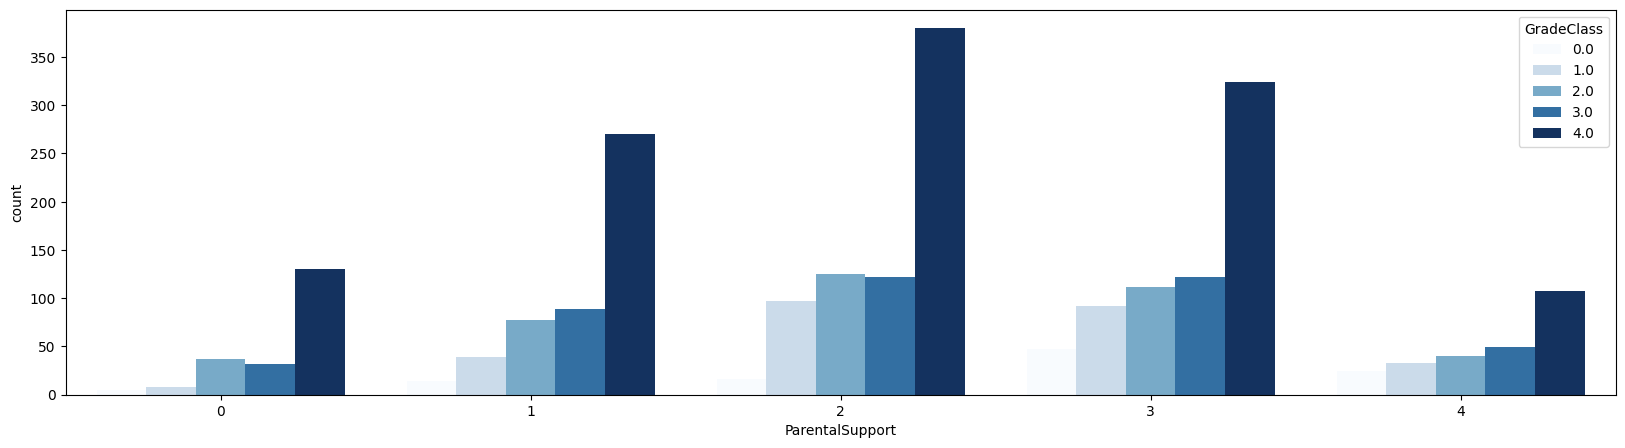

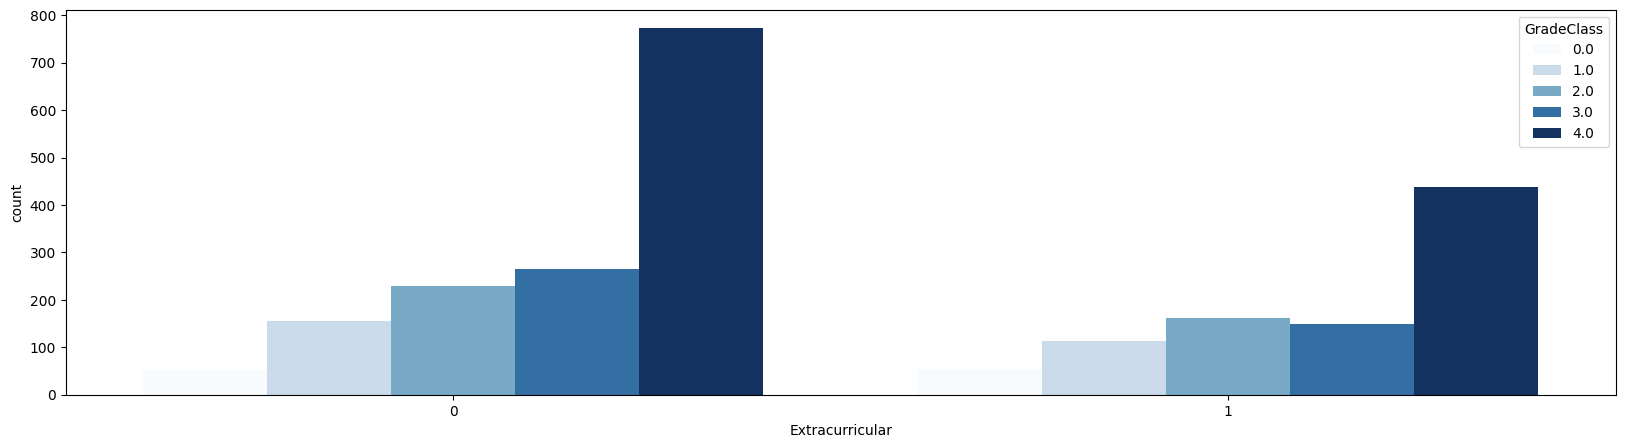

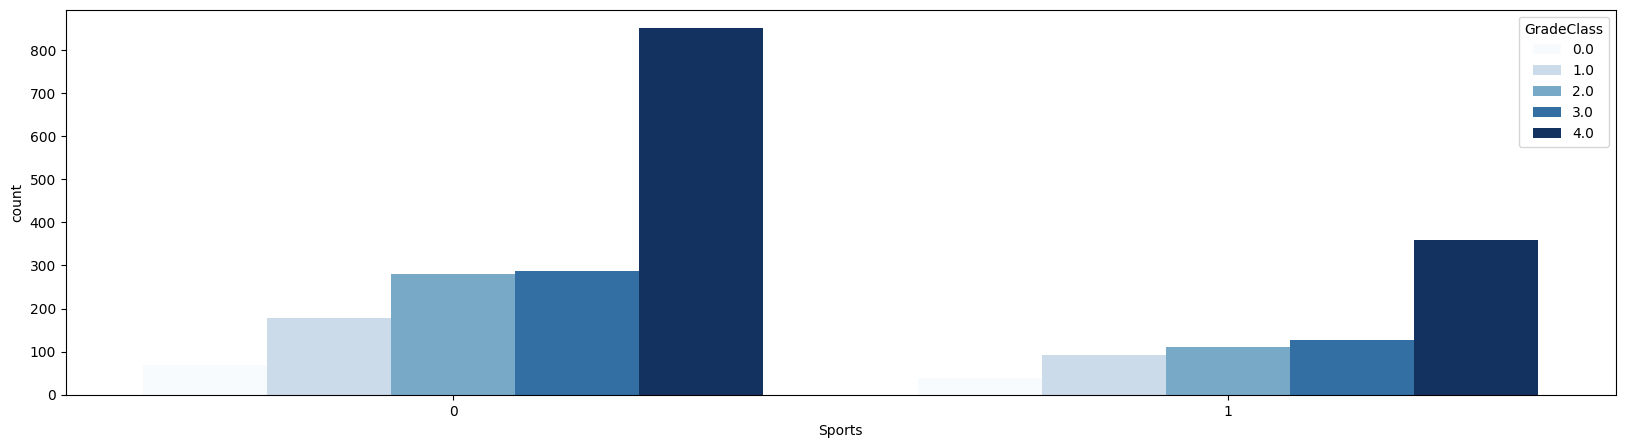

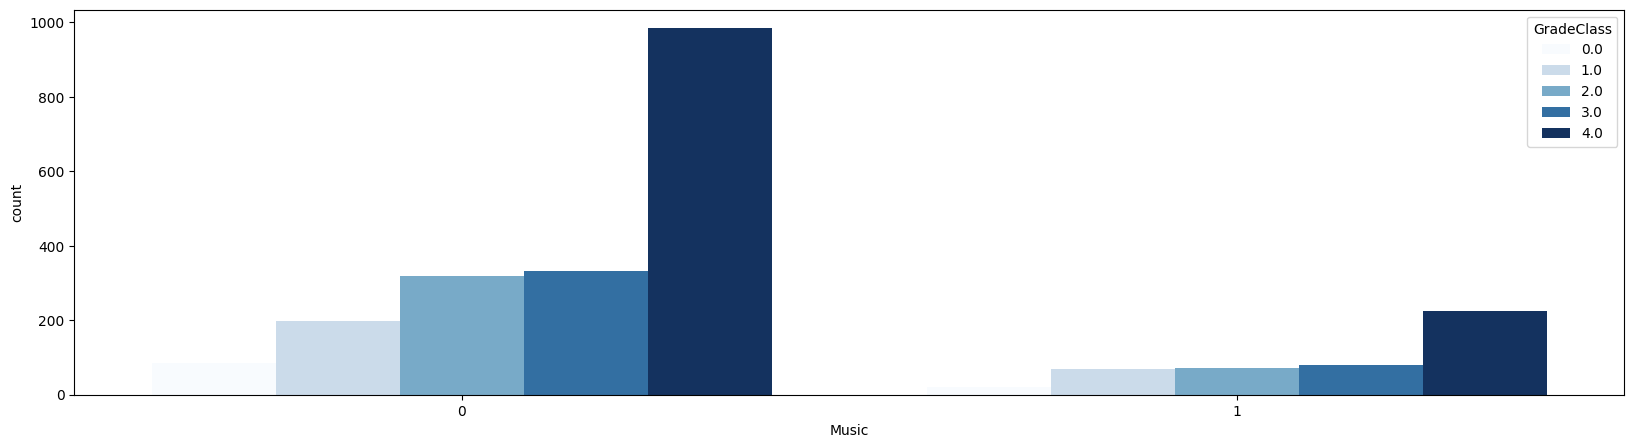

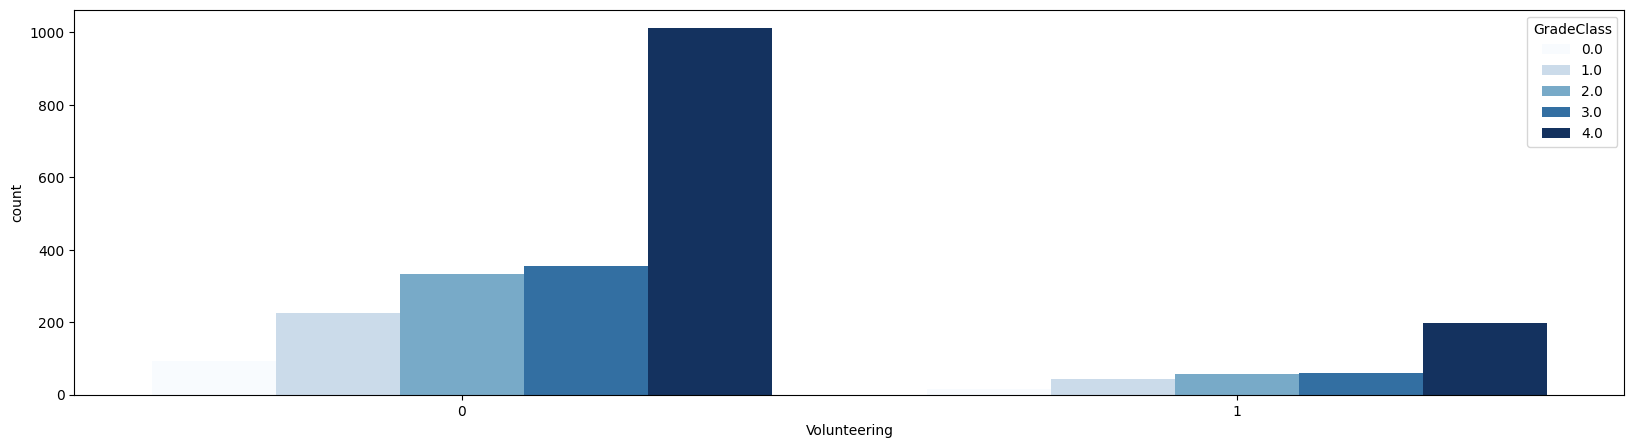

In [52]:
for feature in data[['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering',
       ]]:
  count_plot(feature)

##Observations
1.age has not much effect on grades

2.gemder also has not effect on grades.

3.ethinicity has an major impact on grades as follows
	1.Caucasian           :- high
	2. African American   :- medium
	3. Asian	      :- medium
	4. Other	      :- low
  
4. parental education has an impact on grades
	students having parents had done some college has an higher gradde points than the others
5.absense is also effect the grades
6.tutoring the students has been not taking tutoring they have higher grades
7.students having moderate support from parents has higher grades as compare to others
8.students have not done extracurricular, music, sports, voluntering have an higher grades
than others.


In [63]:
data.corr()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


<Axes: >

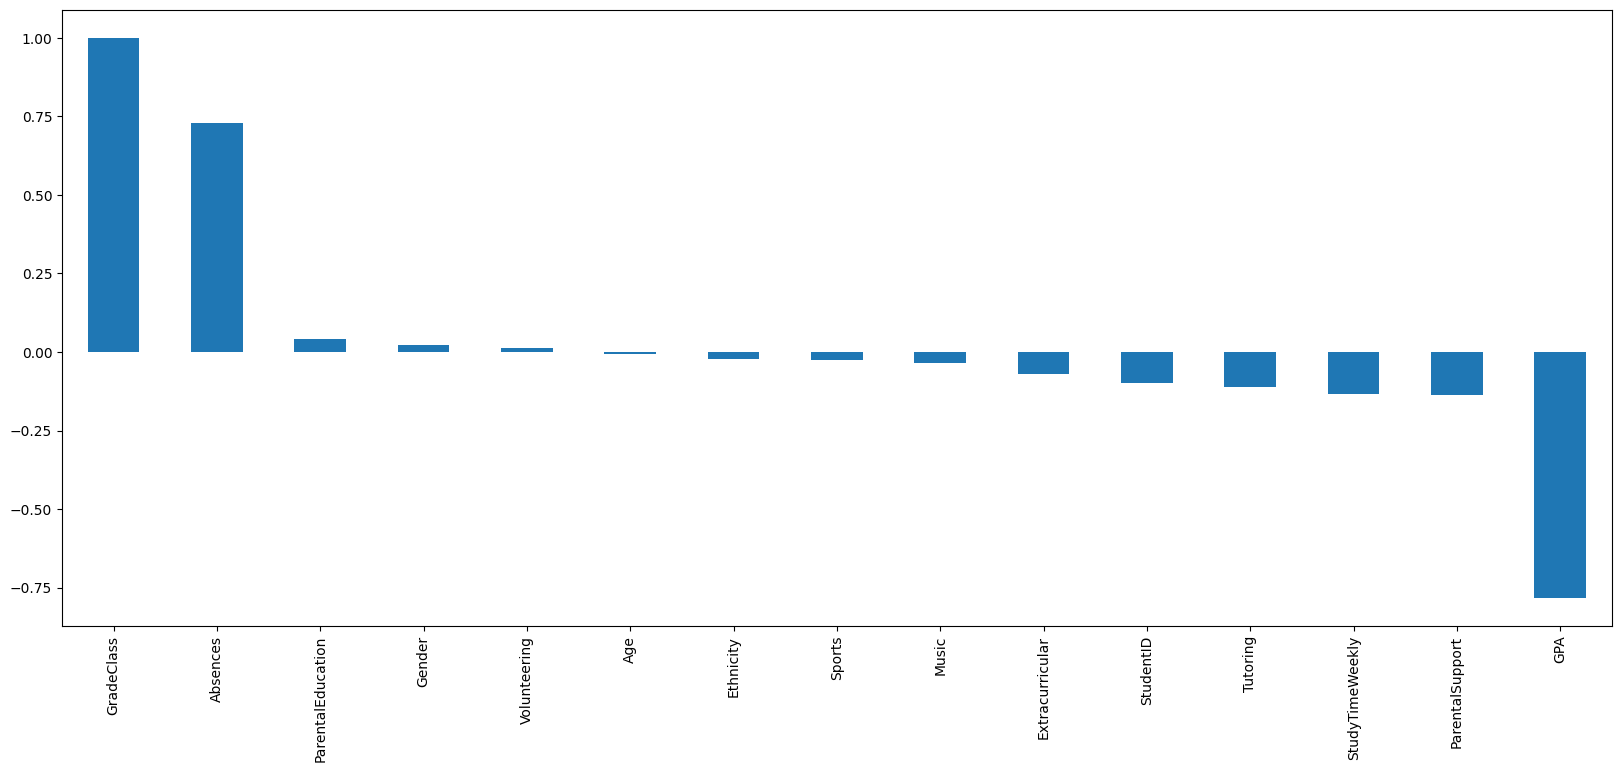

In [64]:
plt.figure(figsize=(20,8))
data.corr()['GradeClass'].sort_values(ascending=False).plot(kind='bar')


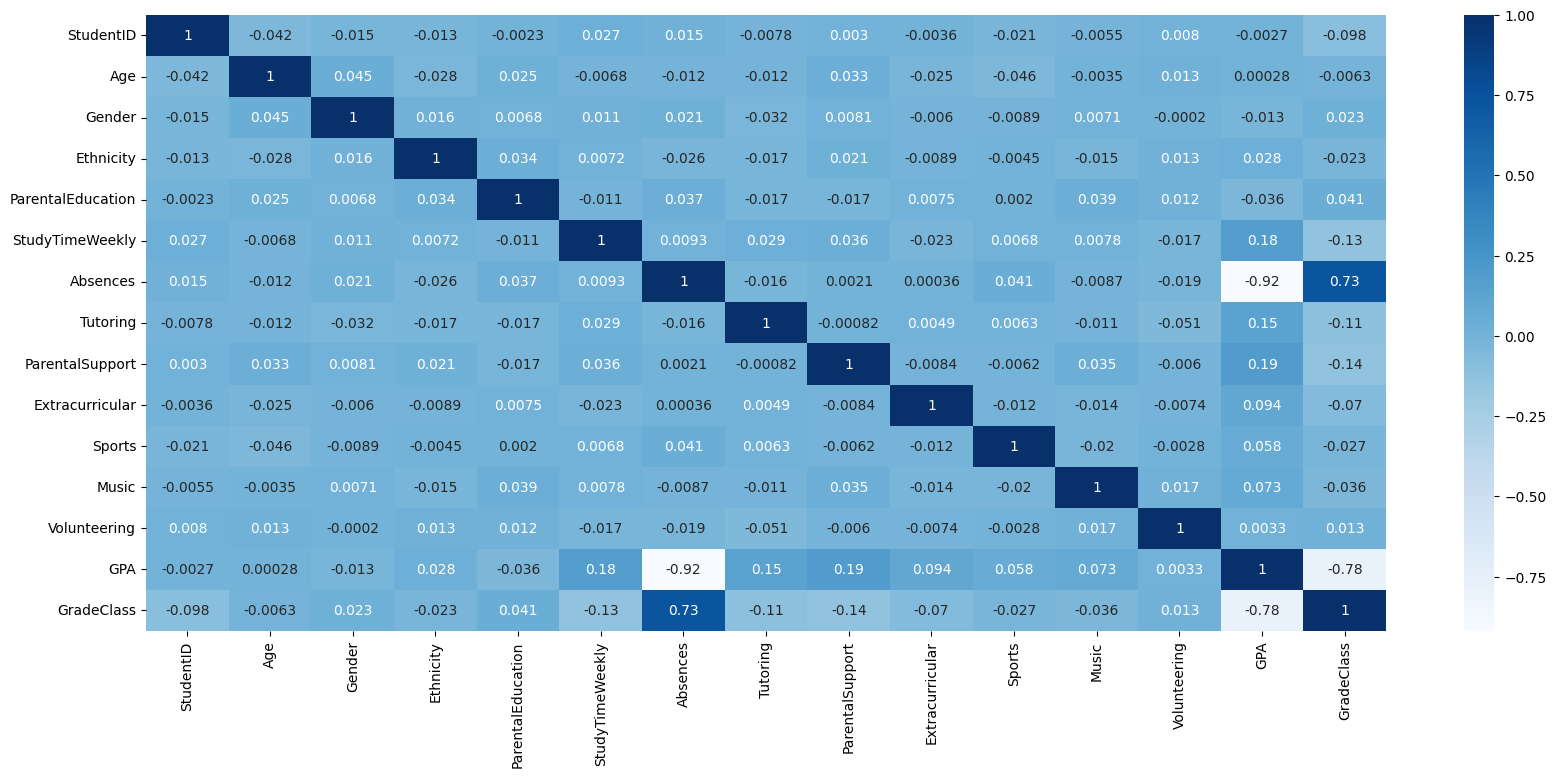

In [67]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.show()

In [72]:
def distribution(feature):
  sns.distplot(data[feature],hist = False,kde=True)
  plt.show()
  print("skewness:-",data[feature].skew())

<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


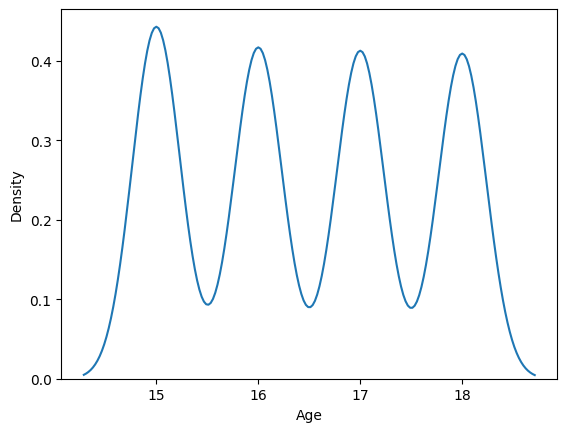

skewness:- 0.03579342435531228


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


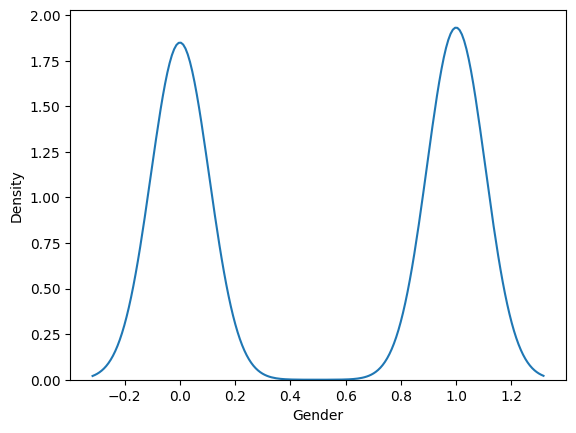

skewness:- -0.04351583131411828


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


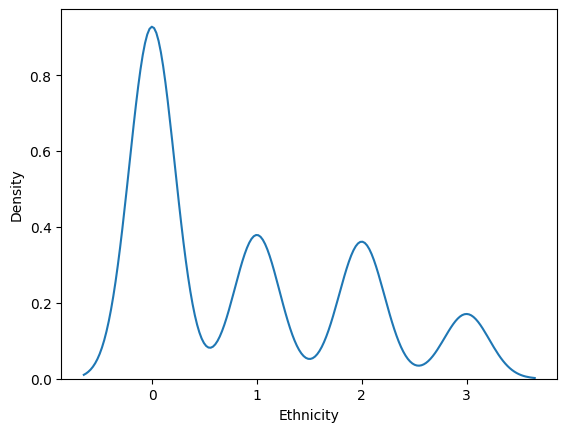

skewness:- 0.7590673429528695


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


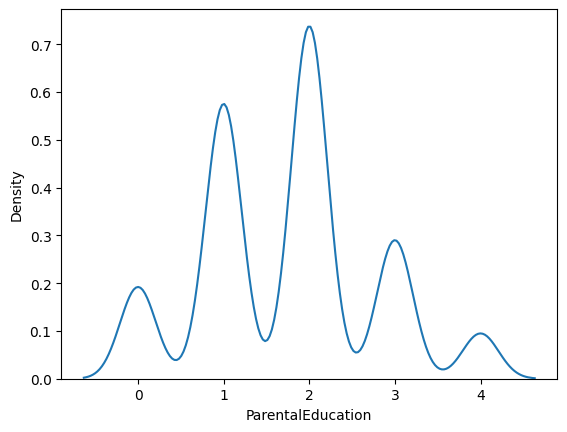

skewness:- 0.21564996130329658


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


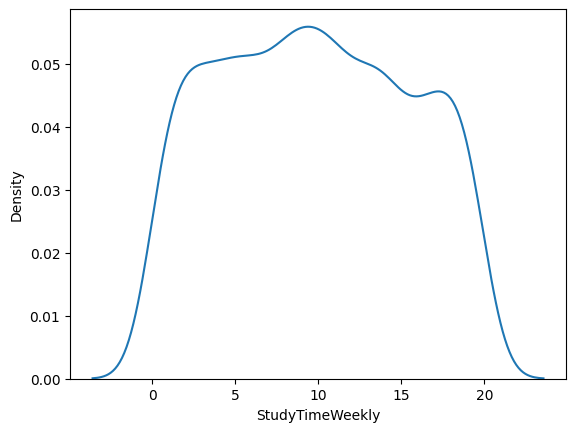

skewness:- 0.05006807255835409


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


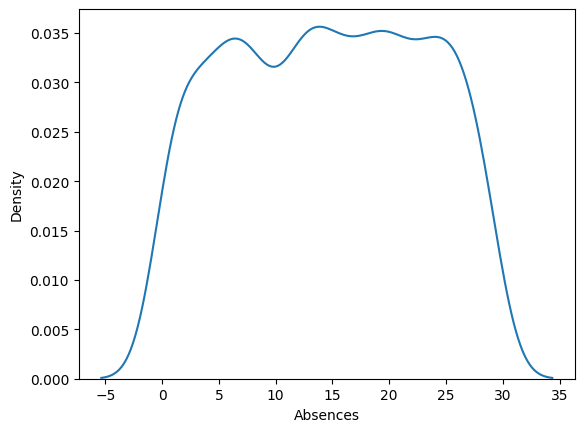

skewness:- -0.026017090405395748


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


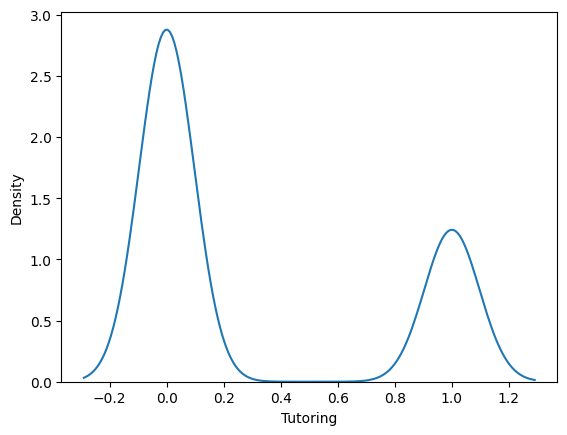

skewness:- 0.8660445294904519


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


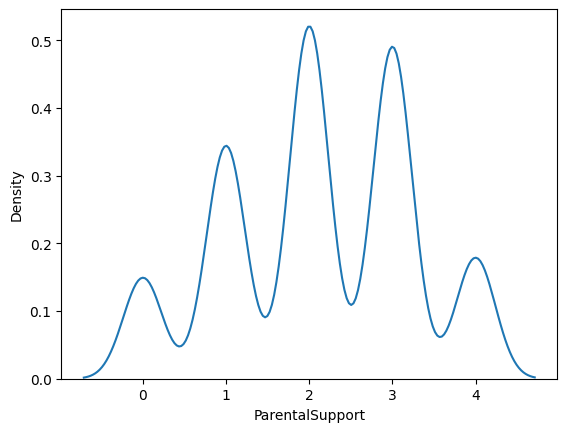

skewness:- -0.16685872350058553


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


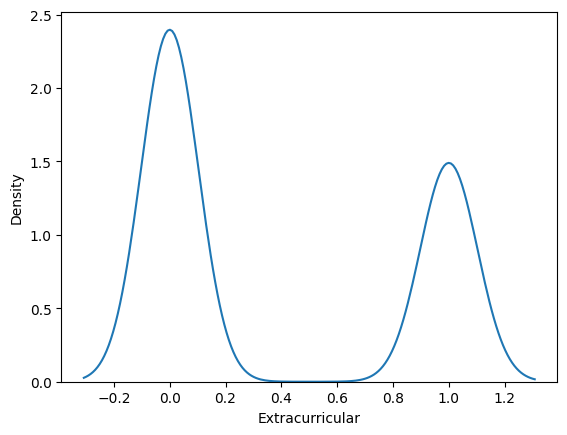

skewness:- 0.48009368751877385


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


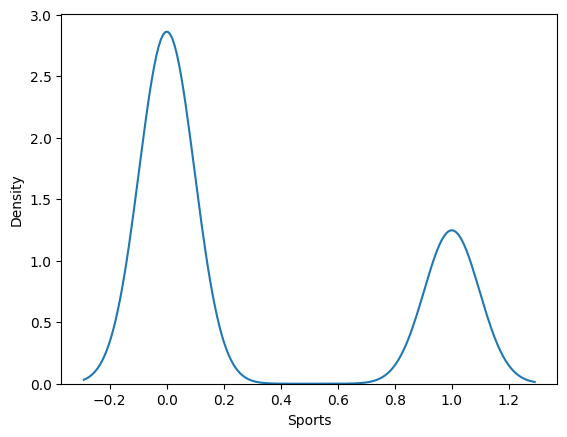

skewness:- 0.8552528291302403


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


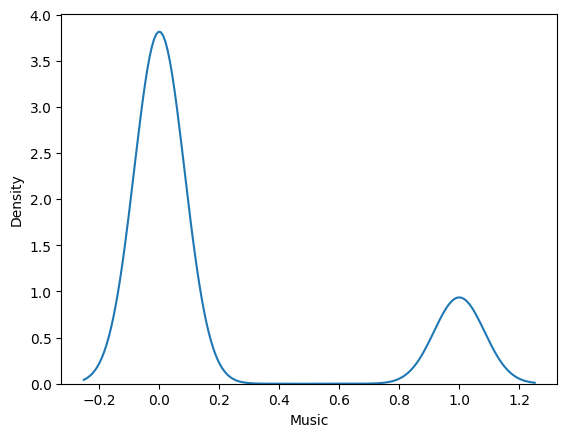

skewness:- 1.525338882432287


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


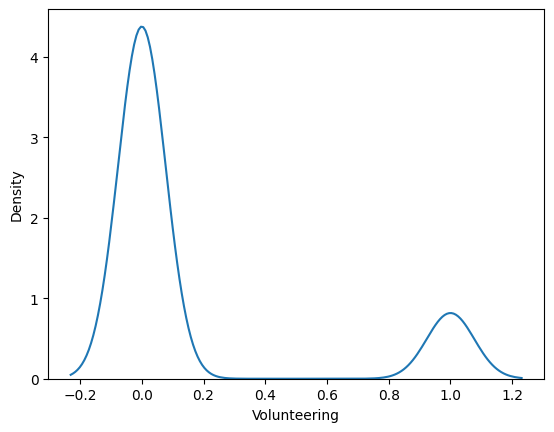

skewness:- 1.8848514866377293


<ipython-input-72-d27bd2ec7e95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature],hist = False,kde=True)


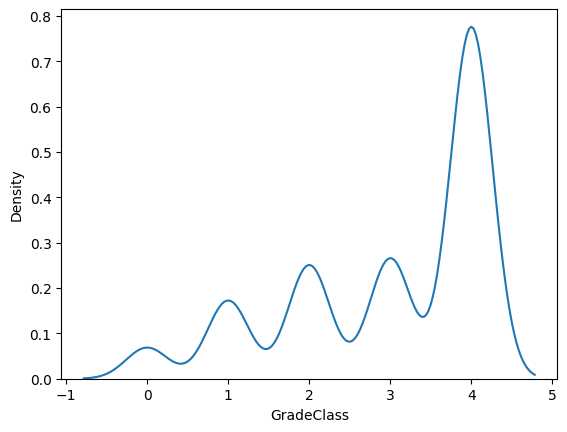

skewness:- -0.900807237222296


In [73]:
for feature in data[['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering','GradeClass']]:
       distribution(feature)